In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


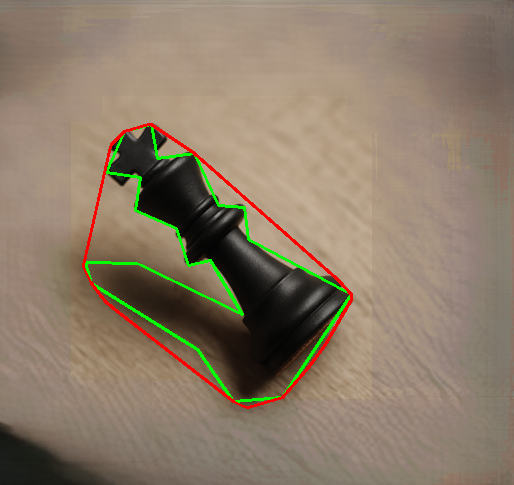

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img_path = '/content/drive/My Drive/img22.png'
img = cv2.imread(img_path)
img_copy = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


contours, _ = cv2.findContours(thresh_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filtered = [c for c in contours if cv2.contourArea(c) > 2000]

if filtered:
    largest = max(filtered, key=cv2.contourArea)

    epsilon = 0.01 * cv2.arcLength(largest, True)
    approx = cv2.approxPolyDP(largest, epsilon, True)
    cv2.drawContours(img_copy, [approx], 0, (0, 255, 0), 2)

    hull = cv2.convexHull(largest)
    cv2.drawContours(img_copy, [hull], 0, (0, 0, 255), 2)

else:
    print("❌ No valid contour found!")

cv2_imshow(img_copy)